# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The The Movie Database (TMDb) dataset consists of 10866 records and 21 fields. The dataset containing details of movies that can be used to analyse the various trends associated over the years. 
>
>The following are the fields in the dataset:
>
>1. id - unique ID corresponding to each record in the dataset
>
>2. imdb_id - unique alphanumeric ID assigned by IMDB
>
>3. popularity - number that denotes the popularity of a movie
>
>4. budget - amount of money spent to make the movie (in dollars)
>
>5. revenue - amount of money earned overall (in dollars)
>
>6. original_title - title of the movie
>
>7. cast - actors/actresses who are part of the movie
>
>8. homepage - URL of the main web page for the movie
>
>9. director - director of the movie
>
>10. tagline - tagline associated with the movie
>
>11. keywords - words that can be used to better describe the movie
>
>12. overview - summary of the movie
>
>13. runtime - total time of the movie (in minutes)
>
>14. genres - genre(s) the movie most appropriately represents
>
>15. production_companies - companies that are responsible for producing the movie
>
>16. release_date - the date on which the movie was released
>
>17. vote_count - number of votes received by the movie
>
>18. vote_average - average number of votes received by the movie (rating of the movie)
>
>19. release_year - year during which the movie was released
>
>20.  budget_adj - the budget of the movie adjusted to inflation with respect to 2010 (in dollars)
>
>21. revenue_adj - the revenue of the movie adjusted to inflation with respect to 2010 (in dollars)

>*Importing all necessary packages for the data analysis*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Questions to be explored

<ol>
    <li><a href="#q1">Which year was most successful at the box office in terms of profit?</a></li>
    <li><a href="#q2">Does a high budget movie earn more revenue at the box office compared to low budget movie? Does a movie with higher rating necessarily gain more revenue in the box office than a movie with lower rating?</a></li>
    <li><a href="#q3">Over the years, how has the number of movies released per genre changed?</a></li>
    <li><a href="#q4">What is the average runtime for each genre? How does the runtime affect the revenue and ratings of the genre of movies?</a></li>
    <li><a href="#q5">In which month has the most number of movies released over the years?</a></li>
    <li><a href="#q6">What kinds of properties are associated with movies that have high revenues?</a></li>          
</ol>

<a id='wrangling'></a>
## Data Wrangling

### General Properties

>*Loading the data from CSV into a dataframe*

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.50,2015,137999939.30,1392445893.00
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.30,348161292.50
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.50,271619025.40
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.00,1902723130.00
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.30,2015,174799923.10,1385748801.00


>*Getting the shape (number of rows and columns) of the dataset*

In [3]:
df.shape

(10866, 21)

>*Getting all the basic information of the dataset*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>*It is observed that there are a lot of missing values in the dataset*
>
>*Release date is an object (string) which is not convinient for further analysis so during clean up, it should be converted to datetime format*

>*Getting the various statistics associated with all the numeric fields of the dataset*

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.00


>*It is observed that there are zero values in runtime, budget_adj and revenue_adj. This could be due to lack of information. The rows containing these invalid values should he handled during clean up.*

>*After initial analysis of the dataset, we can infer that the following fields don't influence the analysis process in a way that can be quantified: id, imdb_id, homepage, tagline, keywords, overview.*
>
>*For instance, the overview of the movie does influence the ratings and revenue. However, this influence cannot be determined effectively in a quantitative manner.* 

>*The fields budget and revenue are also not very useful during analysis since they don't account for inflation. So, the values can't be used for direct comparision. The fields budget_adj and revenue_adj that take inflation (with respect to 2010) into consideration can be used for comparision.*

>*Further, fields like production_companies, director, popularity, vote_count and cast are not used in this particular analysis since they not relevant to any of the above mentioned questions to be answered.*

### Data Cleaning

>The following operations have to be done in order to clean the dataset:
>
>1. Drop unnecessary fields
>
>2. Drop duplicate rows
>
>3. Convert release_date to datetime format (currently it is a string) to facilitate analysis
>
>4. Drop rows with missing values
>
>5. Handling rows with runtime, budget_adj and/or revenue_adj values as zero

>*Dropping all fields that are not required for analysis*

In [6]:
df.drop(['id', 'imdb_id', 'revenue', 'budget', 'homepage', 'keywords', 'tagline', 'overview', 'cast', 'director', 'production_companies', 'popularity', 'vote_count'], axis=1, inplace=True)
df.head()

,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,06-09-2015,6.50,2015,137999939.30,1392445893.00
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.10,2015,137999939.30,348161292.50
2,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.30,2015,101199955.50,271619025.40
3,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.50,2015,183999919.00,1902723130.00
4,Furious 7,137,Action|Crime|Thriller,04-01-2015,7.30,2015,174799923.10,1385748801.00


>*Dropping all rows with null or missing values in the dataframe*

In [7]:
# getting number of missing or null values per feature
df.isnull().sum()

original_title     0
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [8]:
# dropping all rows which contains any null or missing values
df.dropna(axis=0, how='any', inplace=True)

# checking to make sure there are no more null or missing values in the dataset
df.isnull().sum()

original_title    0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

>*Dropping all duplicate rows in the dataset*

In [9]:
# getting the number of duplicate rows in the dataset
sum(df.duplicated())

1

In [10]:
# dropping all duplicate rows
df.drop_duplicates(inplace=True)

# checking to confirm that there are no duplicate rows in the dataset
sum(df.duplicated())

0

>*Changing the format of release_date to datetime*

In [11]:
# converting release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# checking if conversion is successful
df.dtypes

original_title            object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

>*Handling all rows with budget_adj, revenue_adj and runtime as zero*
>
>*Various ways considered to handle records with invalid budget, revenue and/or runtime are:*
>
>*1. Drop all records where any of the three features have value as 0*
>
>*2. Binning of values to reduce the effect of the outliers*
>
>*3. Impute all records with value as 0 with mean/median/mode after analysis*

>*Dropping records where any invalid values are present*
>
>*This approach can be used when the number of records dropped are not significant. So, calculating the number of records that will be dropped is the first step.*

In [12]:
# finding number of rows that have invalid budget_adj, revenue_adj or runtime
number_of_rows_with_invalid_budget = df.query('budget_adj == 0')['original_title'].count()
number_of_rows_with_invalid_revenue = df.query('revenue_adj == 0')['original_title'].count()
number_of_rows_with_invalid_runtime = df.query('runtime == 0')['original_title'].count()
print('Number of rows with invalid budget: ', number_of_rows_with_invalid_budget)
print('Number of rows with invalid revnue: ', number_of_rows_with_invalid_revenue)
print('Number of rows with invalid runtime: ', number_of_rows_with_invalid_runtime)

Number of rows with invalid budget:  5674
Number of rows with invalid revnue:  5993
Number of rows with invalid runtime:  30


>*Rows may have more than one feature with value as zero so the total number of rows to be dropped can be calculated as follows:
Number of rows to be dropped = invalid_budget + invalid_revenue + invalid_runtime - invalid_budget_and_revenue - invalid_budget_and_runtime - invalid_revenue_and_runtime + all_invalid_values*

In [13]:
number_of_rows_with_invalid_budget_and_revenue = df.query('budget_adj == 0 and revenue_adj == 0')['original_title'].count()
number_of_rows_with_invalid_revenue_and_runtime = df.query('revenue_adj == 0 and runtime == 0')['original_title'].count()
number_of_rows_with_invalid_runtime_and_budget = df.query('runtime == 0 and budget_adj == 0')['original_title'].count()
number_of_rows_with_all_invalid_values = df.query('revenue_adj == 0 and runtime == 0 and budget_adj == 0')['original_title'].count()
number_of_rows_to_be_dropped = number_of_rows_with_invalid_budget + number_of_rows_with_invalid_revenue + number_of_rows_with_invalid_runtime - number_of_rows_with_invalid_budget_and_revenue - number_of_rows_with_invalid_revenue_and_runtime - number_of_rows_with_invalid_runtime_and_budget + number_of_rows_with_all_invalid_values
print('Number of rows to be dropped: ', number_of_rows_to_be_dropped)

Number of rows to be dropped:  6988


>*The number of records that would be dropped would be greater than 50% of the total number of records. We would be left with less than 4000 records. So, this is not the right approach to handle the records with invalid values.*

>*Binning*
>
>*We can put all the values of features with invalid values into different bins so that the outliers have a lesser effect on the overall analysis.*
>
>*In this case, however, looking at the quartile values, many of the bins would consist of only invalid values. This does not help the clean up effort effectively.*

>*Imputing invalid values with mean/median/mode*
>
>*Since the outliers are artificial (do not exist in reality), we can either have a mean/median/mode imputation or we can also use statistical model to predict values of outlier observation and impute it with predicted values.*

In [14]:
# getting the mean
df[['budget_adj', 'revenue_adj', 'runtime']].mean()

budget_adj    17587121.44
revenue_adj   51477974.92
runtime            102.14
dtype: float64

In [15]:
# getting the median
df[['budget_adj', 'revenue_adj', 'runtime']].median()

budget_adj     0.00
revenue_adj    0.00
runtime       99.00
dtype: float64

In [16]:
# getting the mode
df[['budget_adj', 'revenue_adj', 'runtime']].mode()

,budget_adj,revenue_adj,runtime
0,0.00,0.00,90


>*Since the number of records with invalid budget_adj and revenue_adj is very high, we cannot use the median and mode for imputation. The mean, even though strongly influenced by the invalid values, can used. The mode is used for imputation for runtime.*

In [17]:
df.loc[df['budget_adj'] == 0, 'budget_adj'] = df['budget_adj'].mean()
df.loc[df['revenue_adj'] == 0, 'revenue_adj'] = df['revenue_adj'].mean()
df.loc[df['runtime'] == 0, 'runtime'] = df['runtime'].mode()[0]

In [18]:
df.describe()

,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10842.00,10842.00,10842.00,10842.00,10842.00
mean,102.39,5.97,2001.31,26791080.77,79932826.77
std,30.84,0.93,12.81,30532638.15,136690652.61
min,2.00,1.50,1960.00,0.92,2.37
25%,90.00,5.40,1995.00,17587121.44,51477974.92
50%,99.00,6.00,2006.00,17587121.44,51477974.92
75%,111.00,6.60,2011.00,20925067.03,51477974.92
max,900.00,9.20,2015.00,425000000.00,2827123750.00


>*It can be observed that there is a significant difference between the min and 25% values for runtime, revenue_adj and budget_adj. These are natural outliers and can be retained for analysis.*

>*The data is now cleaned up and ready for further analysis.*

<a id='eda'></a>
## Exploratory Data Analysis

### Utility Functions

>This section consists of functions that will be used regularly throughout this analysis.

In [19]:
# function used to draw a bar graph given the details of the plot
def draw_bar_graph(x, y, x_label, y_label, x_tick_label, title, rotation=None):
    plt.figure(figsize=(10, 10))
    plt.bar(x, y)
    plt.title(title)
    plt.xticks(x, x_tick_label, rotation=rotation)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid();

In [20]:
# function used to draw a scatter plot given the details of the plot
def draw_scatter_plot(x, y, title, x_label, y_label):
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid();

In [21]:
# function used to plot a histogram
def draw_histogram(x, no_of_bins, title, x_label, y_label):
    plt.figure(figsize=(10, 10))
    n, bins, patches = plt.hist(x, no_of_bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid();

<a id='q1'></a>
### Question 1: Which year was most successful at the box office in terms of profit?

>**BASIC IDEA**
>
>*Using the revenue_adj and budget_adj values, profit can be calculated as (revenue_adj-budget_adj)*
>
>*On grouping the movies by release year and getting the average profit for each year, the most successful year for movies in terms of profit can be determined*

In [22]:
# getting the profit for all movies 
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.head()

,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.50,2015,137999939.30,1392445893.00,1254445953.70
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.10,2015,137999939.30,348161292.50,210161353.20
2,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,6.30,2015,101199955.50,271619025.40,170419069.90
3,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.50,2015,183999919.00,1902723130.00,1718723211.00
4,Furious 7,137,Action|Crime|Thriller,2015-04-01,7.30,2015,174799923.10,1385748801.00,1210948877.90


>*Visualising the distribution of profit_adj*

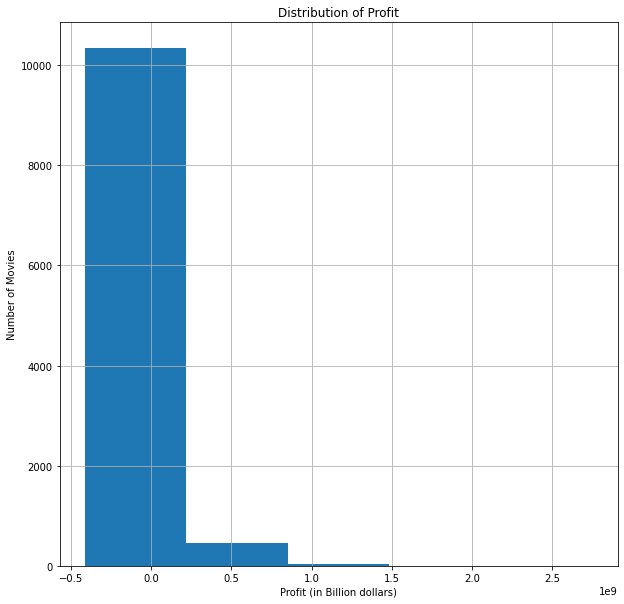

In [23]:
# drawing histogram for profit
num_bins = 5
draw_histogram(df['profit_adj'], num_bins, 'Distribution of Profit', 'Profit (in Billion dollars)', 'Number of Movies')

>*From the histogram above, we can infer that majority of the movies made profit less than 0.25 Billion.*

In [24]:
# grouping by release year and getting the average profit
df_profit = df.groupby(['release_year'])['profit_adj'].mean()
df_profit.head()

release_year
1960   55904298.94
1961   93275102.42
1962   63342496.52
1963   52871330.39
1964   79158721.72
Name: profit_adj, dtype: float64

In [25]:
# getting the year during which the average profit was maximum
df_profit.idxmax()

1977

In [26]:
# getting the maximum value of average profit 
df_profit.max()

147984049.109379

In [27]:
# getting the 10 average profits and corresponding years
df_max_profit = df_profit.nlargest(10)
df_max_profit.sort_index(inplace=True)
df_max_profit

release_year
1961    93275102.42
1965   108759257.45
1967   127915543.16
1970    84149701.09
1972    88261392.37
1973   127208067.79
1974    93610473.74
1975   104927120.51
1977   147984049.11
1979    92288054.66
Name: profit_adj, dtype: float64

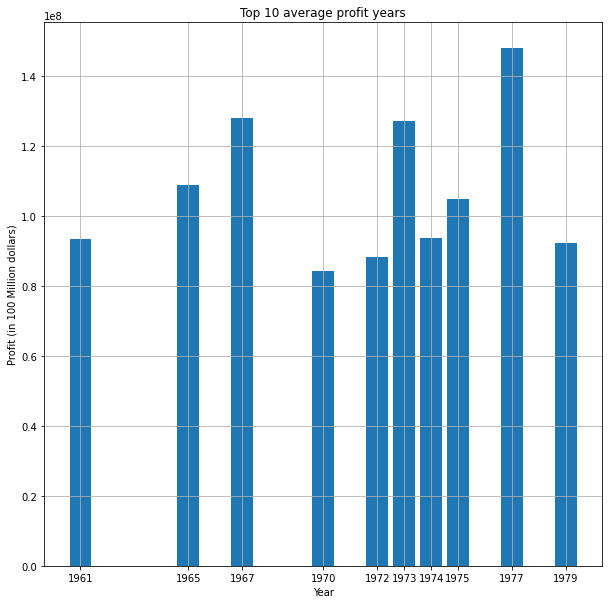

In [28]:
draw_bar_graph(df_max_profit.index, df_max_profit.values, 'Year', 'Profit (in 100 Million dollars)', df_max_profit.index, 'Top 10 average profit years')

>*From the graph above and operations performed previously, we can conclude that 1977 is the year where maximum profit was earned on average.*

<a id='q2'></a>
### Question 2: Does a high budget movie earn more revenue at the box office compared to low budget movie? Does a movie with higher rating necessarily gain more revenue in the box office than a movie with lower rating?

>**BASIC IDEA**
>
>*Budget vs Revenue: A scatter plot can be used to visualize the correlation between budget and revenue earned.*
>
>*Rating vs Revenue: Rating can be measured by using the average votes. A scatter plot can be used to effective visualize the relationship between ratings and revenue earned.*

>*Visualise the distribution of budget*

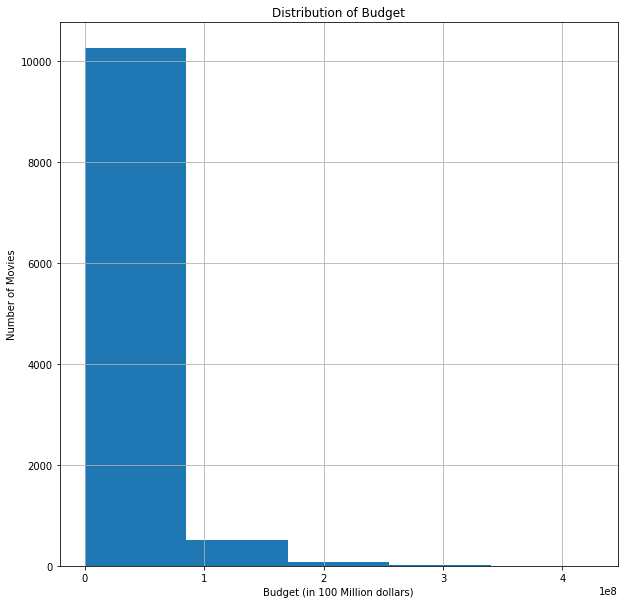

In [29]:
# drawing histogram for budget
num_bins = 5
draw_histogram(df['budget_adj'], num_bins, 'Distribution of Budget', 'Budget (in 100 Million dollars)', 'Number of Movies')

>*From the above histogram, we can infer that most of the movies have a budget below 100 million dollars.*

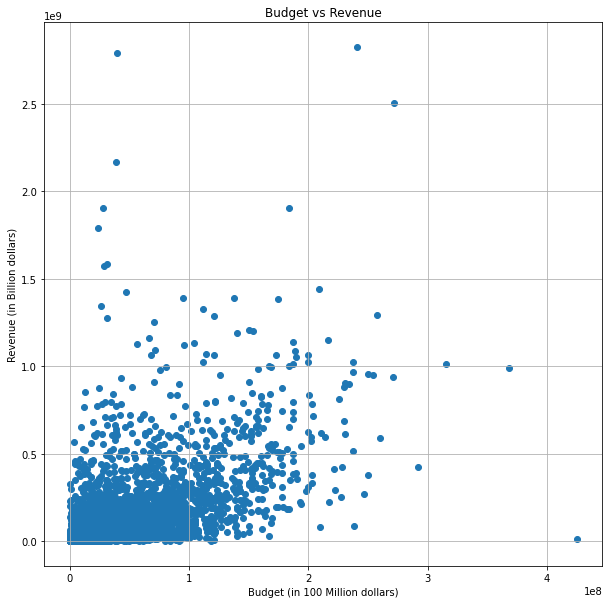

In [30]:
draw_scatter_plot(df['budget_adj'], df['revenue_adj'], 'Budget vs Revenue', 'Budget (in 100 Million dollars)', 'Revenue (in Billion dollars)')

>*From the scatter plot above, we can infer that as the budget of the movie increases, the revenue earned by the movie also increases in many cases. The variables have a loosely linear relationship.*
>
>*The correlation between the variables can be found to confirm this.*

In [31]:
print('The correlation between budget and revenue is', df['budget_adj'].corr(df['revenue_adj']))

The correlation between budget and revenue is 0.6019744363749686


>*The correlation between budget and revenue of a movie is 0.6. The positive correlation indicates a linear relationship between the variables.*
>
>*A correlation value of 1 indicates a perfect linear relationship. Here, we can infer a good linear relationship that holds good most of the time.*

>*Visualise the distribution of ratings*

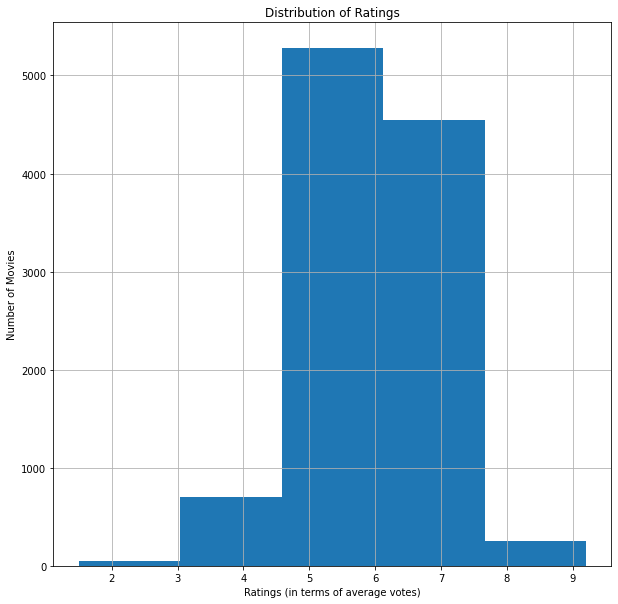

In [32]:
# drawing histogram for ratings
num_bins = 5
draw_histogram(df['vote_average'], num_bins, 'Distribution of Ratings', 'Ratings (in terms of average votes)', 'Number of Movies')

>*From the above histogram, we can infer that most of the movies get a rating between 4.5 and 7.5.*

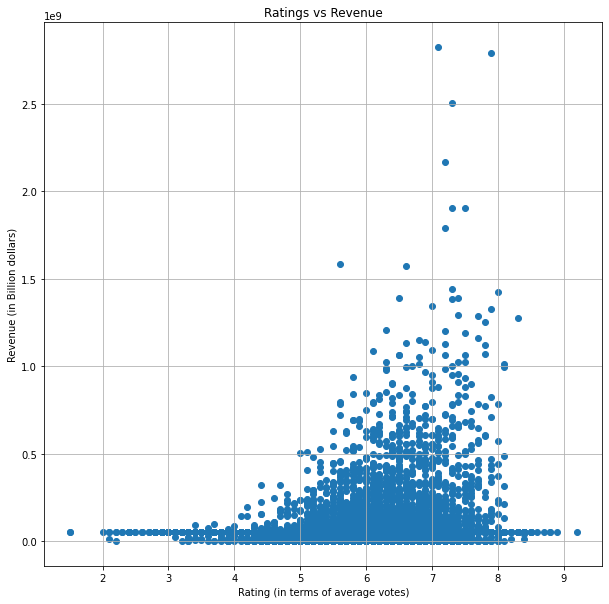

In [33]:
draw_scatter_plot(df['vote_average'], df['revenue_adj'], 'Ratings vs Revenue', 'Rating (in terms of average votes)', 'Revenue (in Billion dollars)')

In [34]:
print('The correlation between rating and revenue is', df['vote_average'].corr(df['revenue_adj']))

The correlation between rating and revenue is 0.17375514262146272


>*The correlation between rating and revenue is positive. However, since it is much closer to 0 than 1, we can infer that the variables are almost independent of each other.*

>*In conclusion, more often than not, a high budget movie earns more revenue than a low budget movie. The ratings and the revenue are almost independent of each other.*

<a id='q3'></a>
### Question 3: Over the years, how has the number of movies released per genre changed?

>**BASIC IDEA**
>
>*Group the dataframe based on genre (from the list of genres) and release year, get the count for each combination. A line chart will clearly show the trends of genre over the years*

In [35]:
# getting a list of all genres
string_of_all_genres = df.genres.str.cat(sep='|')
list_of_all_genres = string_of_all_genres.split('|')
numpy_array_of_all_genres = np.array(list_of_all_genres) 
list_of_all_unique_genres = np.unique(numpy_array_of_all_genres)

list_of_all_unique_genres

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

In [36]:
# getting a dictionary with keys as release years and value as the dataframe with details of movies released in that year
df_release_years = {k: v for k, v in df.groupby('release_year')}

In [37]:
# creating a dataframe with index as the list of all unique genres
df_genres = pd.DataFrame(index=list_of_all_unique_genres)

# populating the dataframe with the count for each combination of year and genre 
for year in df_release_years.keys():
    # df_year will store the dataframe for each particular year
    df_year = df_release_years[year]
    # getting the string of all genres for that particular year
    string_of_all_genres = df_year.genres.str.cat(sep='|')
    # getting a series of count of number of movies per genre for that year
    series_of_all_genres = pd.Series(string_of_all_genres.split('|'))
    genre_count = series_of_all_genres.value_counts()
    # populating these values in the dataframe
    df_genres[year] = genre_count

df_genres = df_genres.fillna(0) 
df_genres = df_genres.transpose()
df_genres['Year'] = df_genres.index
df_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Year
1960,8.00,5.00,0.00,8.00,2.00,0.00,13.00,3.00,2.00,1.00,...,7.00,1.00,0.00,6.00,3.00,0.00,6.00,2.00,6.00,1960
1961,7.00,6.00,1.00,10.00,2.00,0.00,16.00,5.00,2.00,1.00,...,3.00,2.00,1.00,7.00,4.00,0.00,0.00,2.00,3.00,1961
1962,8.00,7.00,0.00,5.00,3.00,0.00,21.00,2.00,1.00,1.00,...,5.00,1.00,4.00,5.00,2.00,0.00,7.00,3.00,3.00,1962
1963,4.00,7.00,1.00,13.00,4.00,0.00,13.00,3.00,2.00,2.00,...,9.00,0.00,6.00,8.00,2.00,0.00,10.00,1.00,2.00,1963
1964,5.00,5.00,2.00,16.00,10.00,0.00,20.00,4.00,4.00,1.00,...,6.00,5.00,4.00,9.00,4.00,0.00,9.00,3.00,1.00,1964


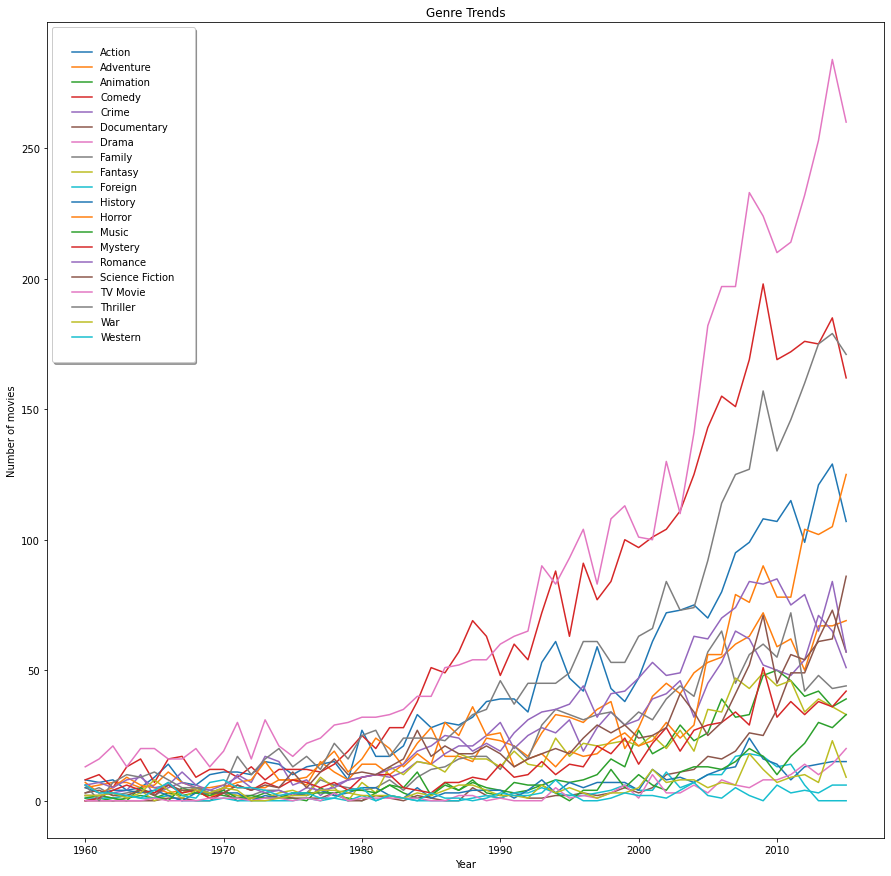

In [38]:
# plotting the trends of the different genres over the years
fig, ax = plt.subplots(figsize = (15,15))
for genre in list_of_all_unique_genres:
    plt.plot(df_genres['Year'], df_genres[genre])
ax.set(xlabel="Year", ylabel = "Number of movies", title = "Genre Trends")
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=2, labels=list_of_all_unique_genres, loc='best');

>*The above chart shows the trend asssociated with number of movies in each genre over the years. We can observe a lot of peaks and dips in all of the lines.*
>
>*We can loosely infer that number of movies in the drama genre has been quite consistently one of the highest over the years when compared to the rest of the genres.*

<a id='q4'></a>
### Question 4: What is the average runtime for each genre? How does the runtime affect the revenue and ratings of the genre of movies?

>**BASIC IDEA**
>
>*For all genres, the average runtime needs to be calculated. A bar graph can be used to represent the runtimes of all genres. We can then determine which genre has the most and least runtimes.*
>
>*For the second part of this question, the average revenue and ratings of each genre needs to be calculated and represented using bar charts.*

>*Visualising the distribution of runtime*

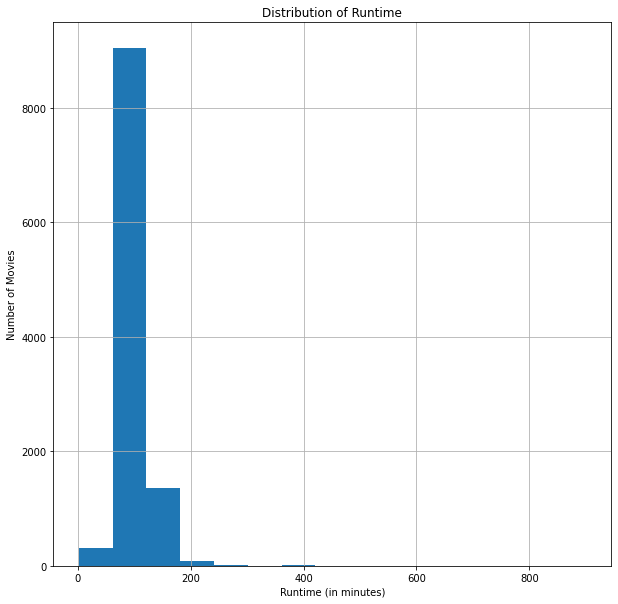

In [39]:
# drawing histogram for runtime
num_bins = 15
draw_histogram(df['runtime'], num_bins, 'Distribution of Runtime', 'Runtime (in minutes)', 'Number of Movies')

>*From the above histogram, we can infer that the majority of movies have a runtime between 60 and 120 minutes.* 

In [40]:
# populating a dataframe with the average runtime, rating and revenue for all genres
genre_df = pd.DataFrame(dtype='float')
for genre in list_of_all_unique_genres:
    # alternate method to get average runtime
    # genre_average_runtime = df[df['genres'].str.contains(genre)]['runtime'].mean()
    genre_average_runtime = df.query('genres.str.contains(@genre)', engine='python')['runtime'].mean()
    genre_df.loc[genre, 'average_runtime'] = genre_average_runtime
    genre_average_rating = df.query('genres.str.contains(@genre)', engine='python')['vote_average'].mean()
    genre_df.loc[genre, 'average_rating'] = genre_average_rating
    genre_average_revenue = df.query('genres.str.contains(@genre)', engine='python')['revenue_adj'].mean()
    genre_df.loc[genre, 'average_revenue'] = genre_average_revenue
    
genre_df

,average_runtime,average_rating,average_revenue
Action,104.99,5.79,116028927.60
Adventure,106.23,5.94,163652228.89
Animation,68.18,6.40,119280196.18
Comedy,97.01,5.91,75339254.31
Crime,106.98,6.12,78725555.93
Documentary,103.17,6.91,43638582.62
Drama,110.65,6.17,67302483.97
Family,89.75,6.00,117762044.07
Fantasy,100.84,5.86,136804542.66
Foreign,107.71,5.98,44773871.36


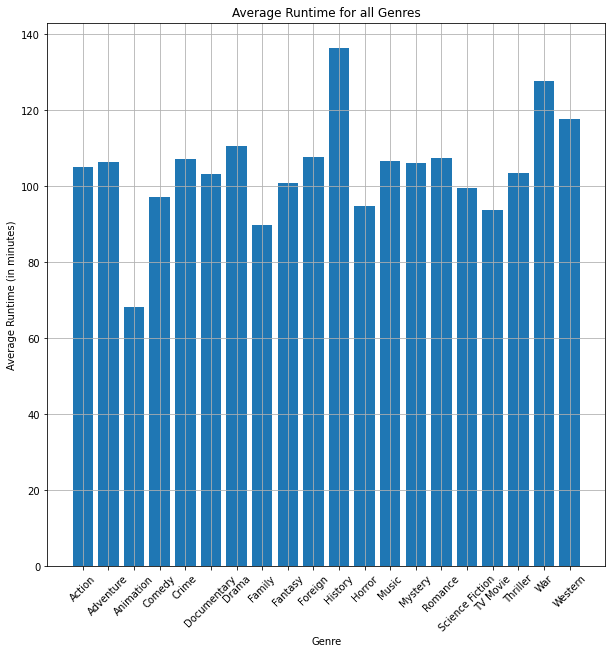

In [41]:
draw_bar_graph(genre_df.index, genre_df.average_runtime, 'Genre', 'Average Runtime (in minutes)', genre_df.index, 'Average Runtime for all Genres', '45')

>*The genre with the most average runtime is History and that with least average runtime is Animation.*

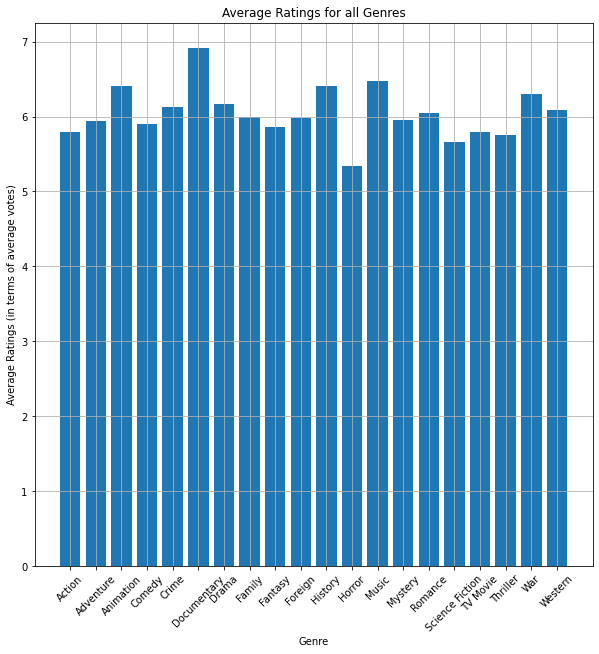

In [42]:
draw_bar_graph(genre_df.index, genre_df.average_rating, 'Genre', 'Average Ratings (in terms of average votes)', genre_df.index, 'Average Ratings for all Genres', '45')

>*The genre with the highest average ratings is Documentary and that with lowest average ratings is Horror.*

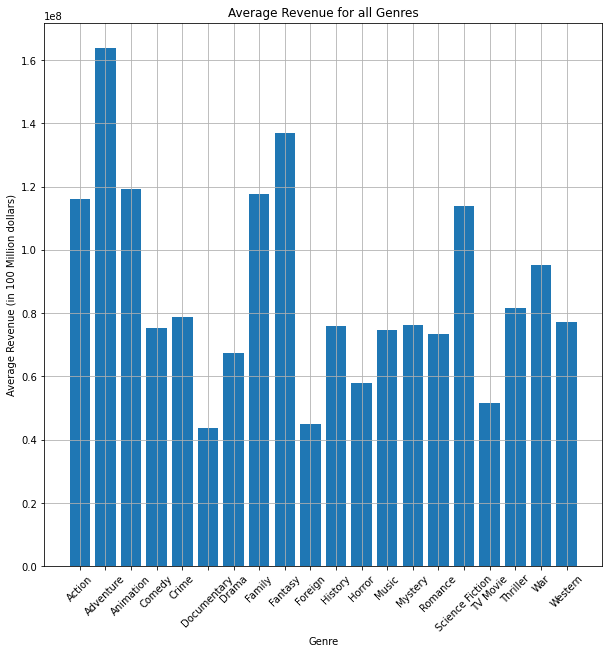

In [43]:
draw_bar_graph(genre_df.index, genre_df.average_revenue, 'Genre', 'Average Revenue (in 100 Million dollars)', genre_df.index, 'Average Revenue for all Genres', '45')

>*The genre with the highest average revenue is Adventure
and that with lowest average revenue is Documentary.*

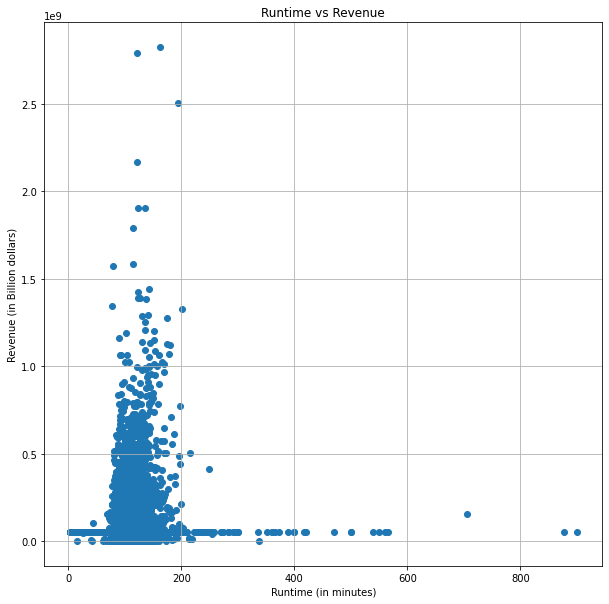

In [44]:
draw_scatter_plot(df['runtime'], df['revenue_adj'], 'Runtime vs Revenue', 'Runtime (in minutes)', 'Revenue (in Billion dollars)')

In [45]:
print('The correlation between runtime and revenue is',df['runtime'].corr(df['revenue_adj']))

The correlation between runtime and revenue is 0.1552402063308387


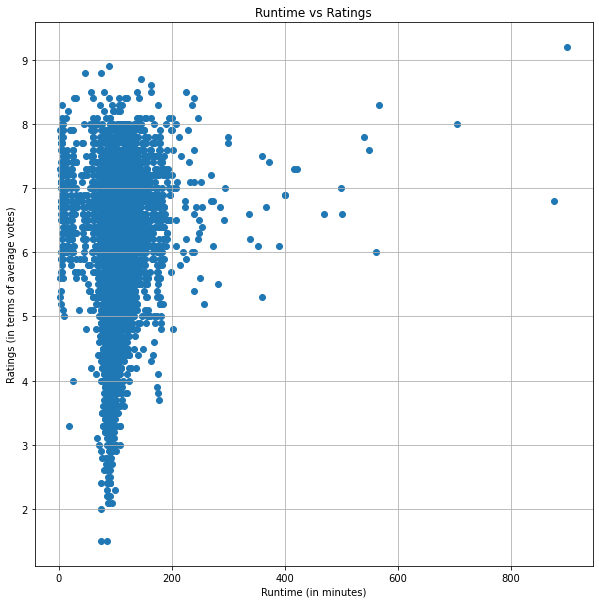

In [46]:
draw_scatter_plot(df['runtime'], df['vote_average'], 'Runtime vs Ratings', 'Runtime (in minutes)', 'Ratings (in terms of average votes)')

In [47]:
print('The correlation between runtime and ratings is',df['runtime'].corr(df['vote_average']))

The correlation between runtime and ratings is 0.15628783560007933


>*From the above scatter plots - runtime vs ratings and runtime vs revenue & the correlation values, we can conclude that the correlation is positive in both cases but weak.*

<a id='q5'></a>
### Question 5: In which month has the most number of movies released over the years?

>**BASIC IDEA**
>
>*We need to get the number of movies released per month and plot the same in a bar chart.*

In [48]:
# getting release month from the release date
df['release_month'] = df['release_date'].dt.month
df.head()

,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,profit_adj,release_month
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.50,2015,137999939.30,1392445893.00,1254445953.70,6
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.10,2015,137999939.30,348161292.50,210161353.20,5
2,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,6.30,2015,101199955.50,271619025.40,170419069.90,3
3,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.50,2015,183999919.00,1902723130.00,1718723211.00,12
4,Furious 7,137,Action|Crime|Thriller,2015-04-01,7.30,2015,174799923.10,1385748801.00,1210948877.90,4


In [49]:
# groupby release month and get the count
release_month_count = df.groupby(['release_month'])['original_title'].count()
release_month_count

release_month
1      916
2      687
3      821
4      797
5      808
6      826
7      798
8      916
9     1330
10    1148
11     814
12     981
Name: original_title, dtype: int64

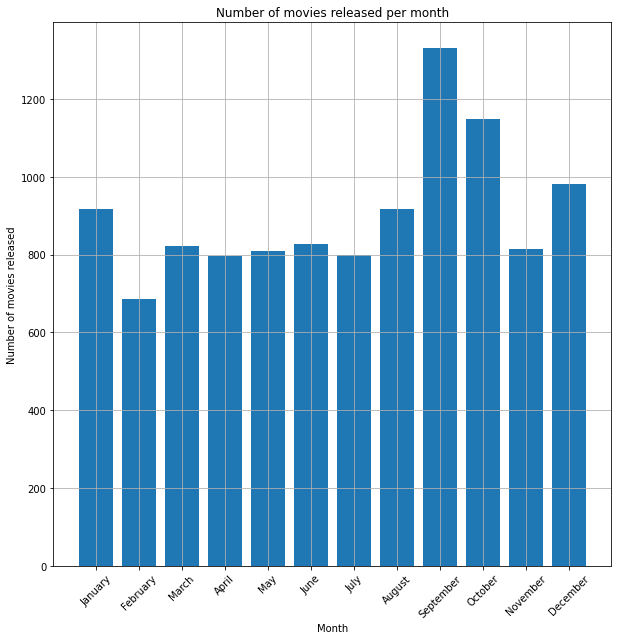

In [50]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
draw_bar_graph(release_month_count.index, release_month_count.values, 'Month', 'Number of movies released', months, 'Number of movies released per month', '45')

>*From the bar graph above, we can conclude that the months where most and least number of movies have been released over the years are September and February respectively.*

<a id='q6'></a>
### Question 6: What kinds of properties are associated with movies that have high revenues?

>**BASIC IDEA**
>
>*By getting the relationship between the revenue and the various numeric fields - ratings, budget and runtime, we can determine the properties that are associated with high revenue movies.*
>
>*Scatter plots can be used to get the relationship between the features and a correlation heatmap can be used to visualize the correlation between the features.*

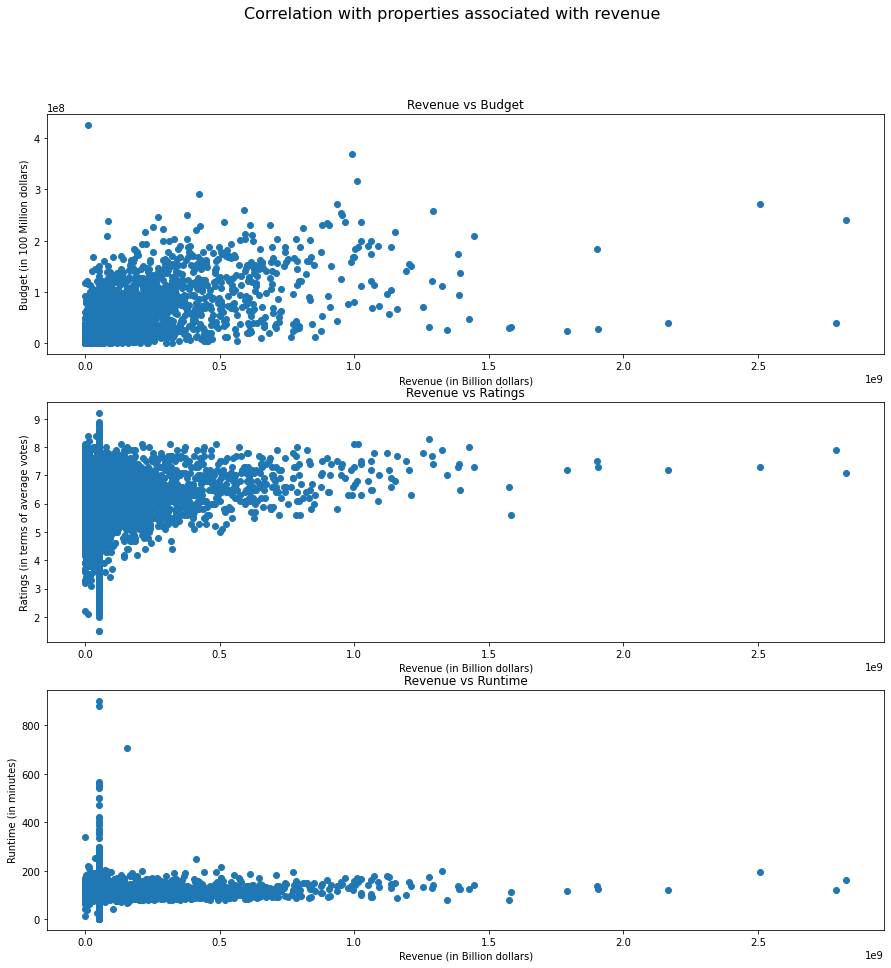

In [51]:
# scatter plots of revenue against runtime, ratings and budget 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,15))
fig.suptitle('Correlation with properties associated with revenue', fontsize=16)

ax1.scatter(df['revenue_adj'], df['budget_adj'])
ax1.title.set_text('Revenue vs Budget')
ax1.set_xlabel('Revenue (in Billion dollars)')
ax1.set_ylabel('Budget (in 100 Million dollars)')

ax2.scatter(df['revenue_adj'], df['vote_average'])
ax2.title.set_text('Revenue vs Ratings')
ax2.set_xlabel('Revenue (in Billion dollars)')
ax2.set_ylabel('Ratings (in terms of average votes)')

ax3.scatter(df['revenue_adj'], df['runtime'])
ax3.title.set_text('Revenue vs Runtime')
ax3.set_xlabel('Revenue (in Billion dollars)')
ax3.set_ylabel('Runtime (in minutes)');


>*The above scatter plots show that the revenue has a positive correlation with the budget, ratings and runtime of the movies. However, in case of the runtime and ratings, the correlation is so weak that the features are almost independent.*

In [52]:
# getting the correlation matrix
correlation_matrix = df[['runtime', 'revenue_adj', 'vote_average', 'budget_adj']].corr()
correlation_matrix.columns = correlation_matrix.index = ['runtime', 'revenue', 'ratings', 'budget']
correlation_matrix

,runtime,revenue,ratings,budget
runtime,1.00,0.16,0.16,0.21
revenue,0.16,1.00,0.17,0.60
ratings,0.16,0.17,1.00,0.09
budget,0.21,0.60,0.09,1.00


>*A correlation matrix contains the correlation coefficient of each feature with every other feature. Every feature is completely positively correlated with itself (correlation coefficient=1). The above matrix is a mirror image of itself along the primary diagonal.*

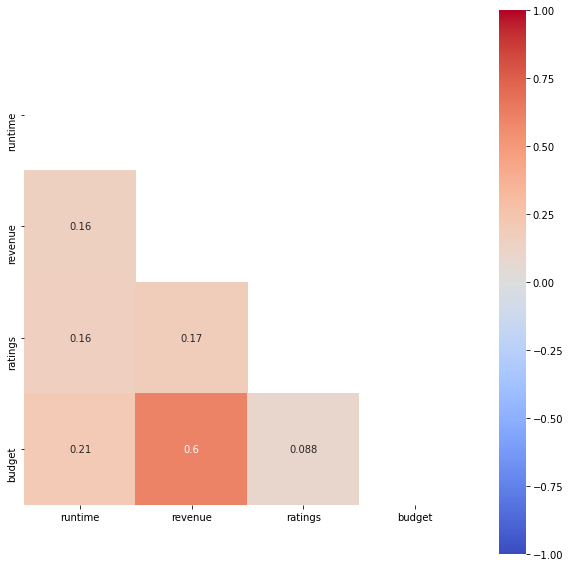

In [53]:
# creating the heatmap using the correlation matrix
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask, square=True);

>*A heatmap visually represents the correlation matrix.*
>
>*The correlation coefficients can take a value between -1 and 1. -1 indicates negative correlation (inverse proporationality), 0 indicates that the features are independent of each other and 1 indicates positive correlation (linear proportionality).*
>
>*In the above heatmap, (1)the darker the shade of blue, the more negatively correlated the features are (2)the darker the shade of orange, the more positively correlated the features are (3)the color in the middle of these two that is almost white indicates independence of the fetures.*

>*When the budget of the movie is high, the revenue is also high in most cases. However, the runtime and ratings do not influence the revenue earned as much.*

<a id='conclusions'></a>
## Conclusions

>*CONCLUDING REMARKS:*
>
>1. The year 1977 was the most successful at the box office on consideration of average profit made per year.
>
>2. Higher budget movies, more often than not, tend to earn more revenue. The rating associated with the movie does not influence the revenue as much.
>
>3. The changes in number of movies of each genre released over the years are not consistent and no clear inference can be made from the analysis.
>
>4. The average runtimes for each genre is as presented during analysis. The runtime has almost no effect on the ratings and revenue of the movie.
>
>5. The most number of movies has been released in the month of September. 
>
>6. High budget movies are more likely to earn more revenue. The runtime and ratings are likely not important properties to be associated with movies with high revenue.

>*LIMITATIONS:*
>
>1. The results are based only on the data considered and has been statistically verified.
>
>2. The correlations do not imply causation and could be mere coincidence or the result of a biased dataset.

>*REFERENCES:*
>
>1. https://datascience.stackexchange.com/questions/29825/create-new-data-frames-from-existing-data-frame-based-on-unique-column-values (For Q3 - creating new dataframe based on unique column values of an existing dataframe)
>
>2. https://stackoverflow.com/questions/57297077/use-variable-in-pandas-query (For Q4 - how to use a variable in a pandas query)
>
>3. https://stackoverflow.com/questions/31391275/using-like-inside-pandas-query (For Q4 - how to get substring match in a pandas query)
>
>4. Pandas, Numpy, Matplotlib and Seaborn documentation
>
>5. https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#three (Data Wrangling - Outlier handling)
